In [1]:
import json
import pandas as pd
from tqdm import  tqdm_notebook
import os

In [2]:
data_cargoes_space_df = pd.read_csv('parsed_data/data_cargoes_space.csv')
data_cargoes_df = pd.read_csv('parsed_data/data_cargoes.csv')
data_result_boxes_df = pd.read_csv('parsed_data/data_result_boxes.csv')
data_result_cargoes_groups_df = pd.read_csv('parsed_data/data_result_cargo_groups.csv')
data_result_cargoes_space_df = pd.read_csv('parsed_data/data_result_cargoes_space.csv')

In [3]:
data_cargoes_space_df.head()

,id,mass,type,axles,title,carrying_capacity,info.uid,info.sort,info.title,size.width,...,indentation.length,indentation.height_top,indentation.length_end,indentation.width_right,loading_size.width,loading_size.height,loading_size.length,info.margin.width,info.margin.height,info.margin.length
0,266,4200,container,[],40' HC (valid),28650,266_0,0,40' HC (valid),2438,...,80,198.0,80.0,43.0,2352,2698,12032,NaN,NaN,NaN
1,269,6450,van,"[{'title': 'Ось 1', 'distance': 1475, 'max_loa...",Фургон №2,9200,269_0,0,Фургон №2,2550,...,0,1120.0,0.0,35.0,2480,2700,5800,NaN,NaN,NaN
2,411,6500,truck,"[{'title': 'Ось 1', 'distance': 1155, 'max_loa...",Еврофура стандарт,20000,411_0,0,Еврофура стандарт,2480,...,46,0.0,46.0,0.0,2480,2650,13600,NaN,NaN,NaN
3,1045,20,pallet,[],EURO (copy),1000,1045_0,0,EURO (copy),800,...,0,0.0,0.0,0.0,800,2500,1200,0.0,0.0,0.0
4,261,4400,container,[],Стандартный 40 футовый контейнер,26600,261_0,0,Стандартный 40 футовый контейнер,2352,...,0,0.0,0.0,0.0,2352,2385,12032,NaN,NaN,NaN


In [4]:
data_cargoes_df.head()

,color,title,article,group_id,group_title,mass,width,height,length,sort,type,count,width_margin,height_margin,length_margin,cargo_id,stacking,turnover,stacking_limit
0,#2dfc83,вальцы,NaN,16ybxv2fszcrvlwl5dlmf19dmstrgeso,Группа 8,19.0,260.0,260.0,520.0,1,box,500.0,0.0,0.0,0.0,lzoaerwrrnl84nl1i3v5qihz6e0rffmm,True,True,0.0
1,#e5d867,зап,NaN,2bhopjhlrrjvx40jk5keff4zuefdv4td,Группа 7,620.0,1750.0,1200.0,2300.0,2,box,1.0,0.0,0.0,0.0,5l0r21qvgjpwlochydnqxunrgz6g5aq9,True,True,0.0
2,#e03a61,лента,NaN,3dnxnlnwpdbuomshfkokrnk1rafduvsf,Группа 6,600.0,1500.0,1300.0,2300.0,3,box,1.0,0.0,0.0,0.0,zjzqnuibdj6h1v7phwnttzc3mhwuvc1m,True,True,0.0
3,#f73dee,нория,NaN,4eto9vdi4gs2mmg1fxnnltnnki8lmmle,Группа 5,940.0,1500.0,1200.0,2300.0,4,box,1.0,0.0,0.0,0.0,wa0dpuepe4xhmahtpflcthcina2rz62t,True,True,0.0
4,#1c128e,Шлифовки,NaN,58dp8vr4gogd18xygnamjesevljclxne,Группа 4,780.0,850.0,2300.0,2300.0,5,box,6.0,0.0,0.0,0.0,gvf0skkpp6yx2l9mgs5n8khth4mrhepw,True,False,0.0


In [9]:
data_result_boxes_df.head(10000)

,id,color,title,article,group_id,group_title,mass,width,height,length,...,y_position,z_position,stacking,turnover,rotation_state,stacking_limit,width_calculated_size,height_calculated_size,length_calculated_size,virtual_positions
0,8,#2dfc83,вальцы,NaN,16ybxv2fszcrvlwl5dlmf19dmstrgeso,Группа 8,19.000,260.0,260.0,520.0,...,0.0,2092.0,True,True,0,0.0,260.0,260.0,520.0,NaN
1,7,#2dfc83,вальцы,NaN,16ybxv2fszcrvlwl5dlmf19dmstrgeso,Группа 8,19.000,260.0,260.0,520.0,...,0.0,1832.0,True,True,0,0.0,260.0,260.0,520.0,NaN
2,6,#2dfc83,вальцы,NaN,16ybxv2fszcrvlwl5dlmf19dmstrgeso,Группа 8,19.000,260.0,260.0,520.0,...,0.0,1572.0,True,True,0,0.0,260.0,260.0,520.0,NaN
3,5,#2dfc83,вальцы,NaN,16ybxv2fszcrvlwl5dlmf19dmstrgeso,Группа 8,19.000,260.0,260.0,520.0,...,0.0,1312.0,True,True,0,0.0,260.0,260.0,520.0,NaN
4,4,#2dfc83,вальцы,NaN,16ybxv2fszcrvlwl5dlmf19dmstrgeso,Группа 8,19.000,260.0,260.0,520.0,...,0.0,1052.0,True,True,0,0.0,260.0,260.0,520.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,371,#d07000,156,68932335,1ozjodtitjwdaey8vavdfl2y9xgqi6in,Группа не определена,3.125,150.0,213.0,228.0,...,1448.0,174.0,True,True,3,0.0,213.0,228.0,150.0,NaN
9996,298,#d74a7c,148,68932320,1ozjodtitjwdaey8vavdfl2y9xgqi6in,Группа не определена,3.485,150.0,213.0,228.0,...,1407.0,159.0,True,True,1,0.0,228.0,213.0,150.0,NaN
9997,295,#d74a7c,148,68932320,1ozjodtitjwdaey8vavdfl2y9xgqi6in,Группа не определена,3.485,150.0,213.0,228.0,...,1355.0,174.0,True,True,4,0.0,213.0,150.0,228.0,NaN
9998,299,#d74a7c,148,68932320,1ozjodtitjwdaey8vavdfl2y9xgqi6in,Группа не определена,3.485,150.0,213.0,228.0,...,1505.0,174.0,True,True,4,0.0,213.0,150.0,228.0,NaN


In [10]:
data_result_cargoes_groups_df.head()

,color,title,article,group_id,group_title,mass,width,height,length,sort,type,count,width_margin,height_margin,length_margin,cargo_id,stacking,turnover,stacking_limit,prepare_last_result
0,#1c128e,Шлифовки,NaN,58dp8vr4gogd18xygnamjesevljclxne,Группа 4,780.0,850.0,2300.0,2300.0,5,box,3.0,0.0,0.0,0.0,gvf0skkpp6yx2l9mgs5n8khth4mrhepw,True,False,0.0,success
1,#fc41dd,камнет-2,NaN,7jmvq4d0stj3eutoeyvorftz3yhwqhpq,Группа 2,200.0,1000.0,1000.0,1000.0,7,box,1.0,0.0,0.0,0.0,vu5rbbfi0udkmmdcr5ib9guq0bh5ludg,True,True,0.0,success
2,#cedad4,M808A,19,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,136.0,980.0,490.0,1620.0,1,box,1.0,0.0,0.0,0.0,suzxlbth3ghqhitsuo7v3d0cdptd1im3,True,True,0.0,success
3,#55c6b6,RM600AMKII-C,10,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,8.0,410.0,310.0,530.0,1,box,5.0,0.0,0.0,0.0,0dnnzneufon6sbxaqutwlgomgvmt7hrw,True,True,0.0,success
4,#2edd66,D3.2C,7,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,16.0,380.0,330.0,740.0,1,box,10.0,0.0,0.0,0.0,9pyvzhl5ifsnfjcvzpjzjkh3bw2rkhu1,True,True,0.0,success


In [11]:
data_result_cargoes_space_df.head()

,id,mass,type,carrying_capacity,real_center_of_gravity,ideal_center_of_gravity,info.uid,info.sort,info.title,size.width,...,calculation_info.count_cargoes,calculation_info.load_capacity,calculation_info.loading_height,calculation_info.density_percent,calculation_info.remaining_volume,calculation_info.void_space_percent,calculation_info.filling_space_percent,info.margin.width,info.margin.height,info.margin.length
0,266,4200.0,container,28650.0,"[4551.241976893452, 1172.4967907573805, 1172.4...","[6016.0, 0.0, 1176.0]",266_0,0,40' HC (valid),2438.0,...,508.0,28.65,2.600,86.34470,15.83441,20.73886,79.26114,NaN,NaN,NaN
1,269,6450.0,van,9200.0,"[2283.7378757035085, 523.0442461980601, 1513.4...","[2900.0, 0.0, 1240.0]",269_0,0,Фургон №2,2550.0,...,29.0,9.20,2.315,57.74171,22.26146,57.32054,42.67946,NaN,NaN,NaN
2,411,6500.0,truck,20000.0,"[2126.485148514851, 297.48762376237624, 1272.3...","[6800.0, 0.0, 1240.0]",411_0,0,Еврофура стандарт,2480.0,...,9.0,20.00,0.940,35.04518,84.47736,94.51568,5.48432,NaN,NaN,NaN
3,1045,20.0,pallet,1000.0,"[520.0, 1062.0940170940173, 379.3162393162394]","[600.0, 0.0, 400.0]",1045_0,0,EURO (copy),800.0,...,32.0,1.00,2.300,90.51218,0.71126,29.63583,70.36417,0.0,0.0,0.0
4,261,4400.0,container,26600.0,"[6031.418918918923, 980.0675675675676, 1176.0]","[6016.0, 0.0, 1176.0]",261_0,0,Стандартный 40 футовый контейнер,2352.0,...,592.0,26.60,2.000,82.71199,24.18574,35.83405,64.16595,NaN,NaN,NaN


In [12]:
data_result_cargoes_groups_df.head()

,color,title,article,group_id,group_title,mass,width,height,length,sort,type,count,width_margin,height_margin,length_margin,cargo_id,stacking,turnover,stacking_limit,prepare_last_result
0,#1c128e,Шлифовки,NaN,58dp8vr4gogd18xygnamjesevljclxne,Группа 4,780.0,850.0,2300.0,2300.0,5,box,3.0,0.0,0.0,0.0,gvf0skkpp6yx2l9mgs5n8khth4mrhepw,True,False,0.0,success
1,#fc41dd,камнет-2,NaN,7jmvq4d0stj3eutoeyvorftz3yhwqhpq,Группа 2,200.0,1000.0,1000.0,1000.0,7,box,1.0,0.0,0.0,0.0,vu5rbbfi0udkmmdcr5ib9guq0bh5ludg,True,True,0.0,success
2,#cedad4,M808A,19,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,136.0,980.0,490.0,1620.0,1,box,1.0,0.0,0.0,0.0,suzxlbth3ghqhitsuo7v3d0cdptd1im3,True,True,0.0,success
3,#55c6b6,RM600AMKII-C,10,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,8.0,410.0,310.0,530.0,1,box,5.0,0.0,0.0,0.0,0dnnzneufon6sbxaqutwlgomgvmt7hrw,True,True,0.0,success
4,#2edd66,D3.2C,7,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,16.0,380.0,330.0,740.0,1,box,10.0,0.0,0.0,0.0,9pyvzhl5ifsnfjcvzpjzjkh3bw2rkhu1,True,True,0.0,success


In [13]:
data_result_cargoes_groups_df.tail()

,color,title,article,group_id,group_title,mass,width,height,length,sort,type,count,width_margin,height_margin,length_margin,cargo_id,stacking,turnover,stacking_limit,prepare_last_result
3051,#62cc1c,12,NaN,1jzxirphz3egdqyl4o7i5h7qchtaizal,Группа 1,200.0,980.0,1060.0,2300.0,1,box,4.0,0.0,0.0,0.0,85swd5o0wef8lpmu5bx5upqbrhwmehxx,True,True,0.0,success
3052,#e7c09f,11,NaN,1jzxirphz3egdqyl4o7i5h7qchtaizal,Группа 1,1830.0,900.0,800.0,1100.0,1,box,4.0,0.0,0.0,0.0,vtolfshlzm50djhwo82ak0a55ajn1zdl,True,True,0.0,success
3053,#7de251,6,NaN,1jzxirphz3egdqyl4o7i5h7qchtaizal,Группа 1,500.0,1610.0,100.0,2310.0,1,box,3.0,0.0,0.0,0.0,rme93z9vtvm4crfd6d3nhp89vihs7zuu,True,True,0.0,success
3054,#db486a,1,NaN,1jzxirphz3egdqyl4o7i5h7qchtaizal,Группа 1,1300.0,570.0,570.0,3980.0,1,box,2.0,0.0,0.0,0.0,2qo79ccznmmlna1bwzwz2tquzbtopioq,True,True,0.0,success
3055,#3d83ed,4,NaN,1jzxirphz3egdqyl4o7i5h7qchtaizal,Группа 1,4200.0,680.0,1195.0,710.0,1,box,4.0,0.0,0.0,0.0,ydjw2mbv1jizskshld20nd9k3jhqflxd,True,True,0.0,success


In [15]:
data_result_cargoes_groups_df[data_result_cargoes_groups_df['group_title'] == 'Группа 1']

,color,title,article,group_id,group_title,mass,width,height,length,sort,type,count,width_margin,height_margin,length_margin,cargo_id,stacking,turnover,stacking_limit,prepare_last_result
2,#cedad4,M808A,19,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,136.0,980.0,490.0,1620.0,1,box,1.0,0.0,0.0,0.0,suzxlbth3ghqhitsuo7v3d0cdptd1im3,True,True,0.0,success
3,#55c6b6,RM600AMKII-C,10,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,8.0,410.0,310.0,530.0,1,box,5.0,0.0,0.0,0.0,0dnnzneufon6sbxaqutwlgomgvmt7hrw,True,True,0.0,success
4,#2edd66,D3.2C,7,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,16.0,380.0,330.0,740.0,1,box,10.0,0.0,0.0,0.0,9pyvzhl5ifsnfjcvzpjzjkh3bw2rkhu1,True,True,0.0,success
5,#ae7254,D300,16,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,20.0,400.0,450.0,630.0,1,box,24.0,0.0,0.0,0.0,wm2krmiqftp1fgtqwtegcnezieyrapzk,True,True,0.0,success
6,#680009,JamLab 6R,4,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,9.5,280.0,380.0,490.0,1,box,1.0,0.0,0.0,0.0,aoxeubcib8lertkmdtp6hwfpk30rjxdq,True,True,0.0,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,#62cc1c,12,NaN,1jzxirphz3egdqyl4o7i5h7qchtaizal,Группа 1,200.0,980.0,1060.0,2300.0,1,box,4.0,0.0,0.0,0.0,85swd5o0wef8lpmu5bx5upqbrhwmehxx,True,True,0.0,success
3052,#e7c09f,11,NaN,1jzxirphz3egdqyl4o7i5h7qchtaizal,Группа 1,1830.0,900.0,800.0,1100.0,1,box,4.0,0.0,0.0,0.0,vtolfshlzm50djhwo82ak0a55ajn1zdl,True,True,0.0,success
3053,#7de251,6,NaN,1jzxirphz3egdqyl4o7i5h7qchtaizal,Группа 1,500.0,1610.0,100.0,2310.0,1,box,3.0,0.0,0.0,0.0,rme93z9vtvm4crfd6d3nhp89vihs7zuu,True,True,0.0,success
3054,#db486a,1,NaN,1jzxirphz3egdqyl4o7i5h7qchtaizal,Группа 1,1300.0,570.0,570.0,3980.0,1,box,2.0,0.0,0.0,0.0,2qo79ccznmmlna1bwzwz2tquzbtopioq,True,True,0.0,success


In [16]:
data_result_cargoes_groups_df[data_result_cargoes_groups_df['prepare_last_result'] != 'success']

,color,title,article,group_id,group_title,mass,width,height,length,sort,type,count,width_margin,height_margin,length_margin,cargo_id,stacking,turnover,stacking_limit,prepare_last_result
17,#9c1604,А7,А7,1yb3uz8b7k81w7hgdjngh25dnpv58ptj,Группа 1,16.0,400.0,320.0,600.0,1,box,1.0,0.0,0.0,0.0,vwknqafxjqx50jfrxphbihww2etuzy8l,False,False,0.0,errorStability
18,#ba0bdc,А9,А9,1yb3uz8b7k81w7hgdjngh25dnpv58ptj,Группа 1,16.0,400.0,320.0,600.0,1,box,1.0,0.0,0.0,0.0,gi6igcsccqofau92o1oxglubfhdjpqes,False,False,0.0,errorStability
19,#658083,А8,А8,1yb3uz8b7k81w7hgdjngh25dnpv58ptj,Группа 1,16.0,400.0,320.0,600.0,1,box,1.0,0.0,0.0,0.0,juxeggnhis55uqrq3rocum6mkvisdvfa,False,False,0.0,errorStability
20,#1f5913,А10,А10,1yb3uz8b7k81w7hgdjngh25dnpv58ptj,Группа 1,187.0,600.0,850.0,600.0,1,box,1.0,0.0,0.0,0.0,johhi7zmrxu2clep1kl2bv2gq63utay9,False,False,0.0,errorStability
21,#759661,А11,А11,1yb3uz8b7k81w7hgdjngh25dnpv58ptj,Группа 1,187.0,600.0,850.0,600.0,1,box,1.0,0.0,0.0,0.0,jwowf959tonaeofgrks9sbbv56a5ws6h,False,False,0.0,errorStability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,#ddf10d,TCM3,NaN,1kptcttb9t67iaqd4pwuyeftf4ozyeuj,Группа не определена,120.0,1000.0,1950.0,1200.0,1,box,1.0,0.0,0.0,0.0,dbz0woy5mpr5alyddqvllrsixhh6kpl2,False,False,0.0,errorIntersectionContainer
2985,#ae7afe,CASE 9,NaN,1kptcttb9t67iaqd4pwuyeftf4ozyeuj,Группа не определена,43.0,1700.0,550.0,2050.0,1,box,1.0,0.0,0.0,0.0,iwqopqbl9mb1cyrd1nfahlmgyhppbfqz,False,False,0.0,errorStayOnOtherStacking
2986,#6a5d24,JamLab 6C,3,1dw3pozfmepfb1da1sitfghijilfy42p,Группа 1,7.5,290.0,290.0,520.0,1,box,3.0,0.0,0.0,0.0,pgrbwi9bwxggzwscj9olud7l1filk7vm,True,True,0.0,errorLoadCapacity
2987,#94cd2a,JamLab 6,1,1dw3pozfmepfb1da1sitfghijilfy42p,Группа 1,24.2,320.0,430.0,1070.0,1,box,1.0,0.0,0.0,0.0,si5cyxcg8rjltksvjder1ob2xegdl9bl,True,False,0.0,errorLoadCapacity


# Зависимость габбаритов и веса коробки от координат в пространстве

In [17]:
data_result_cargoes_groups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   color                3056 non-null   object 
 1   title                3056 non-null   object 
 2   article              2301 non-null   object 
 3   group_id             3056 non-null   object 
 4   group_title          3056 non-null   object 
 5   mass                 3056 non-null   float64
 6   width                3056 non-null   float64
 7   height               3056 non-null   float64
 8   length               3056 non-null   float64
 9   sort                 3056 non-null   int64  
 10  type                 3056 non-null   object 
 11  count                3056 non-null   float64
 12  width_margin         3056 non-null   float64
 13  height_margin        3056 non-null   float64
 14  length_margin        3056 non-null   float64
 15  cargo_id             3056 non-null   o

In [18]:
data_result_boxes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74994 entries, 0 to 74993
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74994 non-null  int64  
 1   color                   74994 non-null  object 
 2   title                   74994 non-null  object 
 3   article                 36201 non-null  object 
 4   group_id                74994 non-null  object 
 5   group_title             74994 non-null  object 
 6   mass                    74994 non-null  float64
 7   width                   74994 non-null  float64
 8   height                  74994 non-null  float64
 9   length                  74994 non-null  float64
 10  sort                    74994 non-null  int64  
 11  type                    74994 non-null  object 
 12  width_margin            74994 non-null  float64
 13  height_margin           74994 non-null  float64
 14  length_margin           74994 non-null

In [22]:
data_result_cargoes_groups_df.head(10)

,color,title,article,group_id,group_title,mass,width,height,length,sort,type,count,width_margin,height_margin,length_margin,cargo_id,stacking,turnover,stacking_limit,prepare_last_result
0,#1c128e,Шлифовки,NaN,58dp8vr4gogd18xygnamjesevljclxne,Группа 4,780.0,850.0,2300.0,2300.0,5,box,3.0,0.0,0.0,0.0,gvf0skkpp6yx2l9mgs5n8khth4mrhepw,True,False,0.0,success
1,#fc41dd,камнет-2,NaN,7jmvq4d0stj3eutoeyvorftz3yhwqhpq,Группа 2,200.0,1000.0,1000.0,1000.0,7,box,1.0,0.0,0.0,0.0,vu5rbbfi0udkmmdcr5ib9guq0bh5ludg,True,True,0.0,success
2,#cedad4,M808A,19,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,136.0,980.0,490.0,1620.0,1,box,1.0,0.0,0.0,0.0,suzxlbth3ghqhitsuo7v3d0cdptd1im3,True,True,0.0,success
3,#55c6b6,RM600AMKII-C,10,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,8.0,410.0,310.0,530.0,1,box,5.0,0.0,0.0,0.0,0dnnzneufon6sbxaqutwlgomgvmt7hrw,True,True,0.0,success
4,#2edd66,D3.2C,7,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,16.0,380.0,330.0,740.0,1,box,10.0,0.0,0.0,0.0,9pyvzhl5ifsnfjcvzpjzjkh3bw2rkhu1,True,True,0.0,success
5,#ae7254,D300,16,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,20.0,400.0,450.0,630.0,1,box,24.0,0.0,0.0,0.0,wm2krmiqftp1fgtqwtegcnezieyrapzk,True,True,0.0,success
6,#680009,JamLab 6R,4,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,9.5,280.0,380.0,490.0,1,box,1.0,0.0,0.0,0.0,aoxeubcib8lertkmdtp6hwfpk30rjxdq,True,True,0.0,success
7,#29a7bc,D3.2R,6,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,13.5,400.0,440.0,440.0,1,box,10.0,0.0,0.0,0.0,4oczginuxyygzqo87ekc3p9nmlx42rak,True,True,0.0,success
8,#ef088d,M806A,18,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,61.4,870.0,510.0,1410.0,1,box,1.0,0.0,0.0,0.0,cz9f3e5vgueyjcqssc1uj0l75tl6lxve,True,True,0.0,success
9,#e4d454,SUB10G,20,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,21.5,440.0,470.0,450.0,1,box,15.0,0.0,0.0,0.0,i9m9imt2eir4flqrea24frekw7ywkd0q,True,True,0.0,success


In [20]:
data_result_cargoes_groups_df[data_result_cargoes_groups_df['group_id'] == '58dp8vr4gogd18xygnamjesevljclxne']

,color,title,article,group_id,group_title,mass,width,height,length,sort,type,count,width_margin,height_margin,length_margin,cargo_id,stacking,turnover,stacking_limit,prepare_last_result
0,#1c128e,Шлифовки,NaN,58dp8vr4gogd18xygnamjesevljclxne,Группа 4,780.0,850.0,2300.0,2300.0,5,box,3.0,0.0,0.0,0.0,gvf0skkpp6yx2l9mgs5n8khth4mrhepw,True,False,0.0,success


In [26]:
data_result_boxes_df[data_result_boxes_df['group_id'] == '1fjaizmnuij0odnvxpzs9fwixaiux0my']

,id,color,title,article,group_id,group_title,mass,width,height,length,...,y_position,z_position,stacking,turnover,rotation_state,stacking_limit,width_calculated_size,height_calculated_size,length_calculated_size,virtual_positions
546,111,#680009,JamLab 6R,4,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,9.5,280.0,380.0,490.0,...,0.0,400.0,True,True,4,0.0,380.0,280.0,490.0,NaN
547,110,#680009,JamLab 6R,4,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,9.5,280.0,380.0,490.0,...,0.0,0.0,True,True,4,0.0,380.0,280.0,490.0,NaN
548,113,#680009,JamLab 6R,4,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,9.5,280.0,380.0,490.0,...,0.0,400.0,True,True,4,0.0,380.0,280.0,490.0,NaN
549,112,#680009,JamLab 6R,4,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,9.5,280.0,380.0,490.0,...,0.0,0.0,True,True,4,0.0,380.0,280.0,490.0,NaN
550,116,#680009,JamLab 6R,4,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,9.5,280.0,380.0,490.0,...,280.0,400.0,True,True,4,0.0,380.0,280.0,490.0,NaN
551,117,#680009,JamLab 6R,4,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,9.5,280.0,380.0,490.0,...,280.0,0.0,True,True,4,0.0,380.0,280.0,490.0,NaN
552,114,#680009,JamLab 6R,4,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,9.5,280.0,380.0,490.0,...,280.0,400.0,True,True,4,0.0,380.0,280.0,490.0,NaN
553,115,#680009,JamLab 6R,4,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,9.5,280.0,380.0,490.0,...,280.0,0.0,True,True,4,0.0,380.0,280.0,490.0,NaN
554,119,#680009,JamLab 6R,4,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,9.5,280.0,380.0,490.0,...,560.0,400.0,True,True,4,0.0,380.0,280.0,490.0,NaN
555,118,#680009,JamLab 6R,4,1fjaizmnuij0odnvxpzs9fwixaiux0my,Группа 1,9.5,280.0,380.0,490.0,...,560.0,0.0,True,True,4,0.0,380.0,280.0,490.0,NaN


<h2> Взаимосвязь высоты и массы

In [28]:
data_result_boxes_df['mass'].describe()

count    74994.000000
mean        50.070923
std        254.001424
min          0.015000
25%          2.000000
50%         10.000000
75%         19.100000
max      19000.000000
Name: mass, dtype: float64

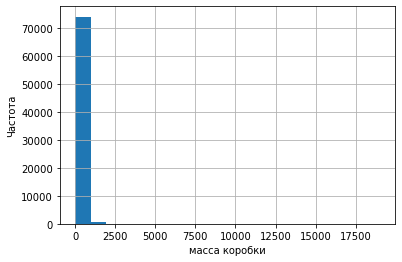

In [53]:
data_result_boxes_df['mass'].hist(bins=20)
plt.xlabel('масса коробки')
plt.ylabel('Частота')
plt.show()

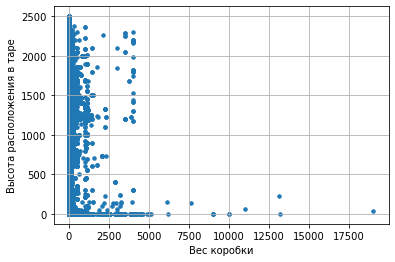

In [46]:
import numpy as np
xs = data_result_boxes_df['mass']
ys = data_result_boxes_df['z_position']
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('Вес коробки')
plt.ylabel('Высота расположения в таре')
plt.show()

<h4> Вывод: Связи между массой коробки и ее высотой нет

<h2> Взаимосвязь высоты и объема

In [55]:
data_result_boxes_df['width'] * data_result_boxes_df['height'] * data_result_boxes_df['length']

0        3.515200e+07
1        3.515200e+07
2        3.515200e+07
3        3.515200e+07
4        3.515200e+07
             ...     
74989    1.551416e+09
74990    1.440000e+09
74991    8.467200e+09
74992    3.719100e+08
74993    1.002000e+08
Length: 74994, dtype: float64

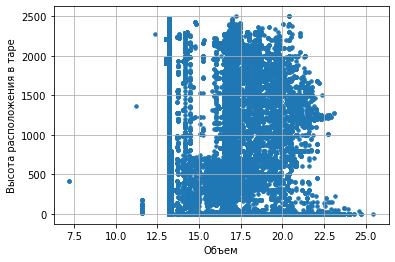

In [56]:
import numpy as np
xs = (data_result_boxes_df['width'] * data_result_boxes_df['height'] * data_result_boxes_df['length']).apply(np.log)
ys = data_result_boxes_df['z_position']
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('Объем')
plt.ylabel('Высота расположения в таре')
plt.show()

<h3> Вывод: взаимосвязи нет

<h2> Распределение груза по объему

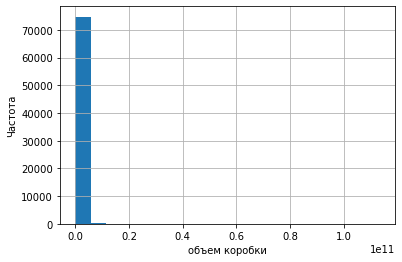

In [60]:
import numpy as np
(data_result_boxes_df['width'] * data_result_boxes_df['height'] * data_result_boxes_df['length']).hist(bins=20)
plt.xlabel('объем коробки')
plt.ylabel('Частота')
plt.show()